# Ant Colony System for the TSP

In [1]:
!rm -r AI2020/
!git clone https://github.com/UmbertoJr/AI2020.git &> /dev/null

name: d198
nPoints: 198
best_sol: 15780.0


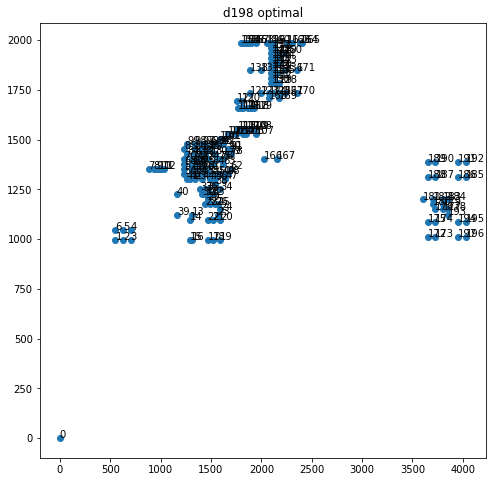

In [2]:
from AI2020.IO_manager.io_tsp import TSP_Instance_Creator
# if you are running from your local remove the prefix AI2020 (comment the previous line and uncomment the following line)
# from IO_manager.io_tsp import TSP_Instance_Creator

ic = TSP_Instance_Creator("standard", 'd198.tsp')
ic.print_info()
ic.plot_data()

name: rat783
nPoints: 783
best_sol: 8806.0


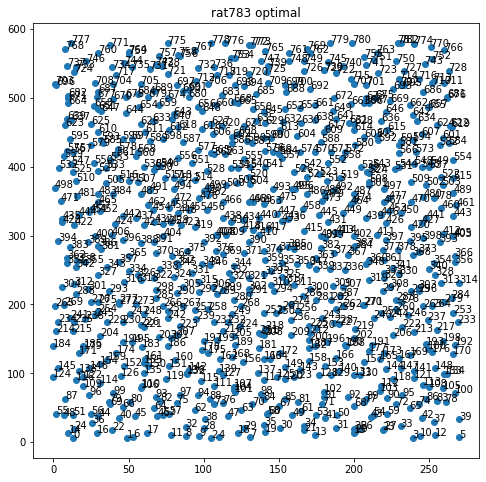

In [3]:
ic = TSP_Instance_Creator("standard", 'rat783.tsp')
ic.print_info()
ic.plot_data()

name: fl1577
nPoints: 1577
best_sol: 22249.0


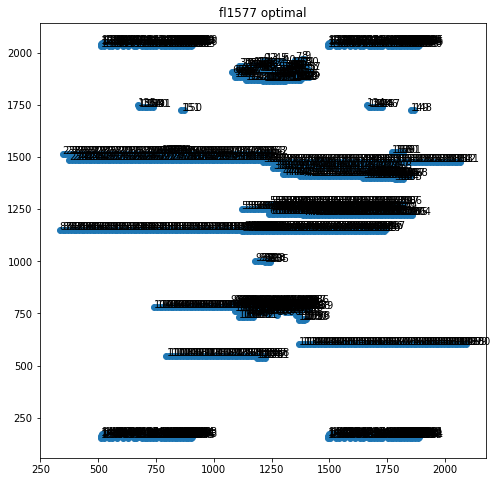

In [4]:
ic = TSP_Instance_Creator("standard", 'fl1577.tsp')
ic.print_info()
ic.plot_data()

In [5]:
import numpy as np
from AI2020.solvers.local_search import twoOpt
from AI2020.solvers.constructive_algorithms import nn, compute_lenght

# nn takes as input the distance matrix and returns 
# the tour and the length constructed with nearest neighbor, i.e.   tour, len_t = nn(dist_mat)

# twoOpt takes as input the solution, the actual_len and the distance matrix 
# and returns the tour and the length created with 2-opt, i.e.     tour, lent_t = twoOpt(solution, actual_len, dist_mat)

class ACS:
  m = 10
  beta = 2
  alpha = rho = 0.1
  cl = 15

  @staticmethod
  def take_candidates(j, dist_mat):
    return list(np.argsort(dist_mat[j])[1:ACS.cl+1])

  def __init__(self, instance):
    self.n = instance.nPoints
    self.dist_mat = instance.dist_matrix
    _, self.L_nn = nn(instance.dist_matrix, starting_node=np.random.choice(self.n))
    self.tau0 = 1./(float(self.n) * self.L_nn)
    self.position = {i: None for i in range(ACS.m)}  # position collector for the Ants, TO BE UPDATED during the steps 
    self.tour = {i: [] for i in range(ACS.m)}  # tour collector for the Ants 
    self.pheromone = {r: [self.tau0]*ACS.cl for r in range(self.n)}
    self.candidate_list = {r: ACS.take_candidates(r, instance.dist_matrix) for r in range(self.n)}
    self.eta = {r: [1/self.dist_mat[r, s] for s in ACS.take_candidates(r, instance.dist_matrix)] for r in range(self.n)}



In [6]:
acs = ACS(ic)

print('tau0 =', acs.tau0)
for j in acs.candidate_list.keys():
  print()
  print("node          :", j)
  print("candidate list:", acs.candidate_list[j][:3])
  print("eta values    :", acs.eta[j][:3])
  print("pheromone     :", acs.pheromone[j][:3])
  if j>2:
    break


tau0 = 2.2424337258803268e-08

node          : 0
candidate list: [1, 14, 2]
eta values    : [0.08333333333333333, 0.05263157894736842, 0.041666666666666664]
pheromone     : [2.2424337258803268e-08, 2.2424337258803268e-08, 2.2424337258803268e-08]

node          : 1
candidate list: [0, 2, 24]
eta values    : [0.08333333333333333, 0.08333333333333333, 0.041666666666666664]
pheromone     : [2.2424337258803268e-08, 2.2424337258803268e-08, 2.2424337258803268e-08]

node          : 2
candidate list: [1, 3, 0]
eta values    : [0.08333333333333333, 0.08333333333333333, 0.041666666666666664]
pheromone     : [2.2424337258803268e-08, 2.2424337258803268e-08, 2.2424337258803268e-08]

node          : 3
candidate list: [2, 4, 1]
eta values    : [0.08333333333333333, 0.08333333333333333, 0.041666666666666664]
pheromone     : [2.2424337258803268e-08, 2.2424337258803268e-08, 2.2424337258803268e-08]


name: myTSP_dim10
nPoints: 10
best_sol: 2732.0


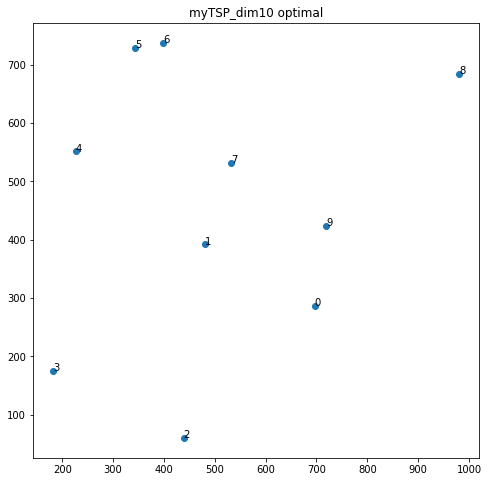

In [7]:
ic = TSP_Instance_Creator("standard", 'myTSP_dim10.tsp')
ic.print_info()
ic.plot_data()

name: myTSP_dim20
nPoints: 20
best_sol: 3372.0


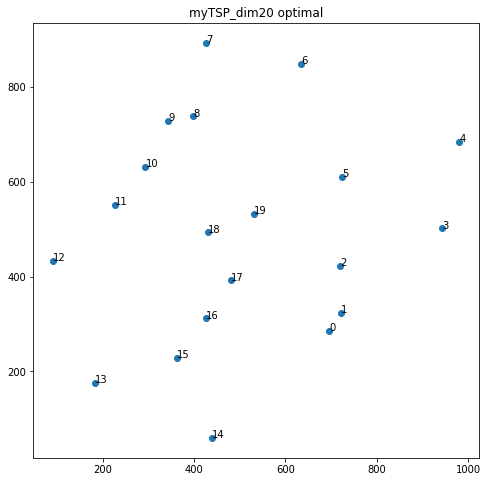

In [8]:
ic = TSP_Instance_Creator("standard", 'myTSP_dim20.tsp')
ic.print_info()
ic.plot_data()

name: myTSP_dim30
nPoints: 30
best_sol: 4651.0


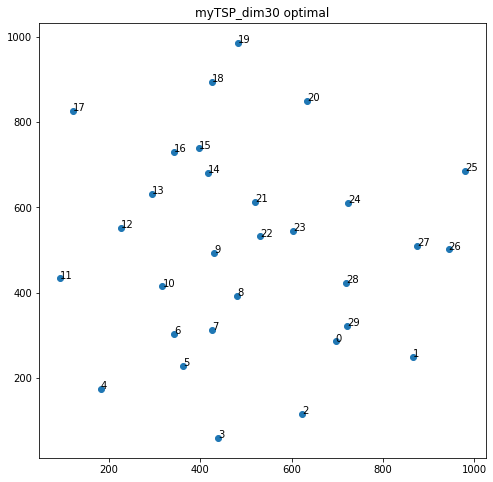

In [9]:
ic = TSP_Instance_Creator("standard", 'myTSP_dim30.tsp')
ic.print_info()
ic.plot_data()

# test twoOpt_with_cl 

the implementation of 2opt with the candidate list has worst performances in term of quality but achieves improvements using fewer computation

In [10]:
from AI2020.solvers.two_opt_with_candidate import twoOpt_with_cl
from time import time

ic = TSP_Instance_Creator("standard", 'fl1577.tsp')
# ic = TSP_Instance_Creator("standard", 'myTSP_dim20.tsp')

initial_sol, initial_len = nn(ic.dist_matrix, starting_node=np.random.choice(ic.nPoints))
acs = ACS(ic)

In [11]:
start = time()
tour, len_new = twoOpt_with_cl(initial_sol, initial_len, ic.dist_matrix, acs.candidate_list)
print(f' 2opt with candidate: initial len {initial_len}, final len {len_new} \n execution time: {time() - start}')

start = time()
tour, len_new = twoOpt(initial_sol, initial_len, ic.dist_matrix)
print(f' 2opt: initial len {initial_len}, final len {len_new} \n execution time: {time() - start}')

 2opt with candidate: initial len 28662.0, final len 28289.0 
 execution time: 2.5049288272857666
 2opt: initial len 28662.0, final len 24569.0 
 execution time: 24.58221125602722


In [12]:


list_time = []
for _ in range(5):
  start = time()
  _ = twoOpt_with_cl(initial_sol, initial_len, ic.dist_matrix, acs.candidate_list)
  list_time.append(time()- start)

print(f"mean {np.mean(list_time)},  std {np.std(list_time)}" )

mean 2.4461215496063233,  std 0.011913695388168891


In [13]:

list_time = []
for _ in range(5):
  start = time()
  _ = twoOpt(initial_sol, initial_len, ic.dist_matrix)
  list_time.append(time() - start)

print(f"mean {np.mean(list_time)},  std {np.std(list_time)}" )

mean 24.325769233703614,  std 0.04543022291417906
